This notebook outlines the results from the subset selection analysis performed using two different approaches.  

__Recapitulation of intersubject correlations__:

The rationale for this analysis is as follows:  One can conceive one of the goals of our project as finding the subset of tests that best captures the variance across subjects across the entire set of variables. That is: What subset of variables would let one best recapitulate the individual differences observed in the sample.  To assess this, we took all possible subsets of 8 tasks from the full dataset (32 choose 8, which is about 10 million) and for each of these subsets computed the correlation matrix across subjects using the reduced dataset.  Then, we computed the correlation between the upper triangle of this matrix with the upper triangle of the same matrix computed from the full dataset.  The point is to find which set of tasks could most effectively recapitulate the observed pattern of individual differences.  This analysis was performed on the TACC Wrangler cluster using discovery_task_analyses/task_subjectsim_prediction.py in the repo.

The notebook below loads the data saved on Wrangler and does some summary analyses on them.

using dataset: Discovery_10-14-2016


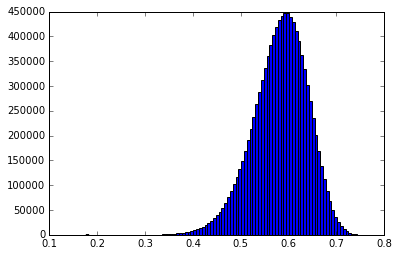

In [8]:

import os,glob,sys,itertools
import numpy,pandas
import json
import scipy.stats
import matplotlib.pyplot as plt

# this is kludgey but it works
sys.path.append('../utils')
from utils import get_info,get_behav_data

dataset=get_info('dataset')
print('using dataset:',dataset)
basedir=get_info('base_directory')
derived_dir=os.path.join(basedir,'Data/Derived_Data/%s'%dataset)
data=pandas.read_csv(os.path.join(derived_dir,'taskdata_clean_cutoff3.00IQR_imputed.csv'))
# get task names and indicator
tasknames=[i.split('.')[0] for i in data.columns]
tasks=list(set(tasknames))
tasks.sort()
taskpresence=numpy.zeros(len(tasks))

#load correlations and get top 1%
cc=numpy.load('cc.npy')
%matplotlib inline
foo=plt.hist(cc,100)

Grab the highest correlations (according to the threshold set in the call to scipy.stats.scoreatpercentile) and then sort those.

In [9]:
allcombs=[i for i in itertools.combinations(range(32),8)]
thresh=scipy.stats.scoreatpercentile(cc,99.99)
print('thresh=',thresh)
goodcc=[c for i,c in enumerate(cc) if c>thresh]
print('%d observations'%len(goodcc))
goodcombs=numpy.array([allcombs[i] for i,c in enumerate(cc) if c>thresh])
goodcc_idx=numpy.argsort(goodcc)[::-1]


thresh= 0.741287891138
1052 observations


Print best combination of tasks

In [10]:
print('best combination:')
for i in goodcombs[goodcc_idx[0]]:
    print(tasks[i])
print('')


best combination:
columbia_card_task_cold
dot_pattern_expectancy
information_sampling_task
local_global_letter
simon
stop_signal
stroop
threebytwo



Print tasks that show up most often across the top selections.

In [11]:
for i,task in enumerate(tasks):
    taskpresence[i]=numpy.mean(goodcombs==i)
taskidx=numpy.argsort(taskpresence)[::-1]
for i in taskidx:
    nvars=len([t for j,t in enumerate(tasknames) if t==tasks[i]])
    print('%0.3f (%d):%s'%(taskpresence[i],nvars,tasks[i]))


0.125 (10):threebytwo
0.116 (10):dot_pattern_expectancy
0.109 (6):stroop
0.086 (6):simon
0.070 (6):information_sampling_task
0.067 (9):local_global_letter
0.062 (5):tower_of_london
0.057 (7):stop_signal
0.055 (6):attention_network_task
0.050 (5):columbia_card_task_cold
0.043 (5):columbia_card_task_hot
0.040 (6):motor_selective_stop_signal
0.031 (6):directed_forgetting
0.018 (3):choice_reaction_time
0.018 (4):adaptive_n_back
0.015 (6):recent_probes
0.014 (4):stim_selective_stop_signal
0.008 (4):angling_risk_task_always_sunny
0.007 (2):psychological_refractory_period_two_choices
0.003 (2):two_stage_decision
0.003 (3):probabilistic_selection
0.001 (2):dietary_decision
0.000 (2):spatial_span
0.000 (2):digit_span
0.000 (2):writing_task
0.000 (1):discount_titrate
0.000 (1):go_nogo
0.000 (1):hierarchical_rule
0.000 (1):keep_track
0.000 (1):ravens
0.000 (1):shift_task
0.000 (1):kirby


__Data reconstruction__:

NOTE: This is still WIP

0.0870957174414


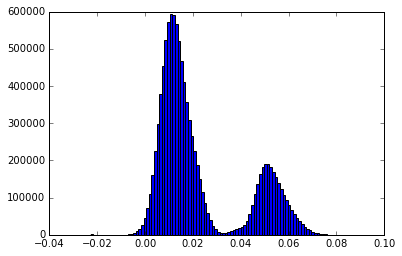

In [16]:
#load correlations and get top 1%
cc=numpy.load('reconstruction_cc.npy')
foo=plt.hist(cc,100)
print(numpy.max(cc))

In [18]:
thresh=scipy.stats.scoreatpercentile(cc,99.99)
print('thresh=',thresh)
goodcc=[c for i,c in enumerate(cc) if c>thresh]
print('%d observations'%len(goodcc))
goodcombs=numpy.array([allcombs[i] for i,c in enumerate(cc) if c>thresh])
goodcc_idx=numpy.argsort(goodcc)[::-1]

print('best combination:')
for i in goodcombs[goodcc_idx[0]]:
    print(tasks[i])
print('')

for i,task in enumerate(tasks):
    taskpresence[i]=numpy.mean(goodcombs==i)
taskidx=numpy.argsort(taskpresence)[::-1]
for i in taskidx:
    nvars=len([t for j,t in enumerate(tasknames) if t==tasks[i]])
    print('%0.3f (%d):%s'%(taskpresence[i],nvars,tasks[i]))



thresh= 0.0772960113644
1052 observations
best combination:
angling_risk_task_always_sunny
hierarchical_rule
keep_track
kirby
psychological_refractory_period_two_choices
shift_task
spatial_span
tower_of_london

0.125 (5):tower_of_london
0.125 (4):angling_risk_task_always_sunny
0.096 (2):psychological_refractory_period_two_choices
0.082 (1):hierarchical_rule
0.061 (1):shift_task
0.061 (1):discount_titrate
0.060 (1):kirby
0.058 (1):keep_track
0.053 (1):go_nogo
0.053 (1):ravens
0.040 (2):digit_span
0.038 (2):spatial_span
0.037 (2):dietary_decision
0.037 (2):two_stage_decision
0.033 (2):writing_task
0.022 (3):probabilistic_selection
0.008 (4):stim_selective_stop_signal
0.005 (6):motor_selective_stop_signal
0.001 (3):choice_reaction_time
0.001 (5):columbia_card_task_cold
0.001 (4):adaptive_n_back
0.001 (7):stop_signal
0.001 (5):columbia_card_task_hot
0.000 (6):information_sampling_task
0.000 (6):attention_network_task
0.000 (6):stroop
0.000 (10):threebytwo
0.000 (9):local_global_letter
0.00